In [3]:
#Data_Analysing_Dataset_LEGO_Pieces

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
colors = pd.read_csv("/Users/laipingping/Desktop/jupternotebook/LEGO Notebook and Data (start)/data/colors.csv")
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [5]:
#how many of the LEGO colours are transparent compared to how many colours are opaque
#using the .nunique() from Pandas 
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique
#To find the number of unique colours, all we need to do is check if every entry in the name column is unique:
colors["name"].nunique()


135

In [6]:
#Find the number of transparent colours: the .groupby() method, with the .count() method.
colors.groupby("is_trans").count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [7]:
#But you might have also come across the very handy .value_counts() method in your research
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
colors.value_counts("is_trans")

is_trans
f    107
t     28
dtype: int64

In [8]:
#Exploring the sets.csv
sets = pd.read_csv("/Users/laipingping/Desktop/jupternotebook/LEGO Notebook and Data (start)/data/sets.csv")
sets.head()


,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [9]:
#In which year were the first LEGO sets released and what were these sets called? 
first_year = sets.sort_values("year")
first_year['year'].head()

9521    1949
9534    1949
9539    1949
9544    1949
9545    1949
Name: year, dtype: int64

In [10]:
#How many different products did the LEGO company sell in their first year of operation? How many types?
#filtering our DataFrame on a condition. 
#We are retrieving the rows where the year column has the value 1949: sets['year'] == 1949.
sets[sets["year"]==1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [11]:
#What are the top 5 LEGO sets with the most number of parts? 
sets.sort_values("num_parts",ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [12]:
#Visualise the Number of Sets Published over Time

# show how many numbers of lego sets relased by one year.
sets_by_year = sets.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [13]:
sets_by_year['set_num'].tail()


year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

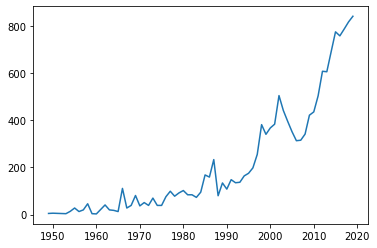

In [15]:
#You also notice that there is an entry for 2021. The .csv file is from late 2020
#If we don't exclude the last two years we get a dramatic drop at the end of the chart. 
#This is quite misleading as it suggests LEGO is in big trouble! Given the dataset does not include a full calendar year for 2020, 
#it's best to exclude the last two rows to get a better picture
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])


In [34]:
#How to use the Pandas .agg() function
#Number of Themes per Calendar Year

#Note, the .agg() method takes a dictionary as an argument. 
#In this dictionary, we specify which operation we'd like to apply to each column.
#In our case, we just want to calculate the number of unique entries in the theme_id column by using our old friend, the .nunique() method.

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html
theme_by_year = sets.groupby('year').agg({'theme_id':pd.Series.nunique})

#Let's give our column in themes_by_year a more appropriate name and let's take a look at what we've got:
theme_by_year.rename(columns={'theme_id':'nr_thems'},inplace=True)
theme_by_year.head()

,nr_thems
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [35]:
theme_by_year.tail()

,nr_thems
year,
2017,89
2018,93
2019,78
2020,82
2021,1


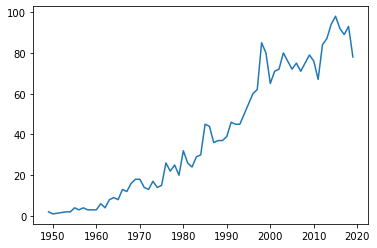

In [40]:
#Create a line plot of the number of themes released year-on-year. Only include the full calendar years in the dataset (1949 to 2019).

plt.plot(theme_by_year.index[:-2], theme_by_year["nr_thems"][:-2])

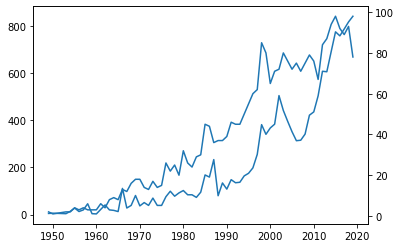

In [45]:
#Superimposing Line Charts with Separate Axes
#Two Separate Axes

#create another axis object: ax2. The key thing is that by using the .twinx() method 
#allows ax1 and ax2 to share the same x-axis

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # share  the same x_axis

ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])
ax2.plot(theme_by_year.index[:-2], theme_by_year["nr_thems"][:-2])


Text(0, 0.5, 'Number of Thems')

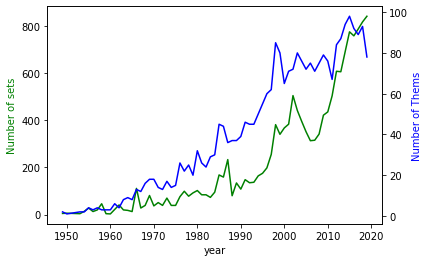

In [49]:
# add some styling
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # share  the same x_axis

#colour in the lines
ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2],color='g')
ax2.plot(theme_by_year.index[:-2], theme_by_year["nr_thems"][:-2],"b")

#add some labels,colour in the axes
ax1.set_xlabel("year")
ax1.set_ylabel("Number of sets",color="green")
ax2.set_ylabel("Number of Thems",color="blue")

In [58]:
#Challenge
#Create a Pandas Series called parts_per_set that has the year as the index and contains 
#the average number of parts per LEGO set in that year

parts_per_set = sets.groupby('year').agg({'num_parts':pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [57]:
parts_per_set.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


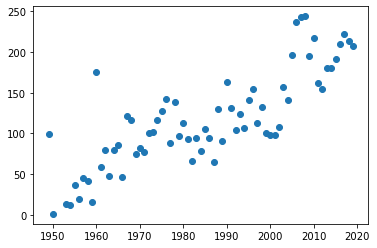

In [59]:
#Create a Scatter Plot
#need to call the .scatter() instead of the .plot() method to create the chart.
#For the x-values, we'll use the index of the parts_per_set Series (the years) and for the y-values, 
#we'll use the values of the series (the column name happens to be num_parts)

#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])


In [63]:
#Relational Database Schemas: Primary and Foreign Keys
#To count the number of sets per Theme we can use the .value_counts() method on our theme_id column.
sets['theme_id'].value_counts()

158    753
501    656
494    398
435    356
503    329
      ... 
210      1
455      1
383      1
245      1
519      1
Name: theme_id, Length: 571, dtype: int64

In [65]:
#We need to find the names of the themes based on the theme_id from the themes.csv file.
#Challenge
#Search for the name 'Star Wars'. How many ids correspond to the 'Star Wars' name in the themes.csv?
#Use the ids you just found and look for the corresponding sets in the sets.csv (Hint: you'll need to look for matches in the theme_id column).

themes = pd.read_csv("/Users/laipingping/Desktop/jupternotebook/LEGO Notebook and Data (start)/data/themes.csv")
themes.head()


,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [71]:
#Each value in the id column is unique (this is the primary key for the themes table).
themes[themes.name == "Star Wars"]


,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [74]:
#Why would Star Wars have so many different themes? We can check which products corresponded to those themes in the sets.csv:
sets[sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [75]:
sets[sets.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


In [86]:
#How to Merge DataFrames and Create Bar Charts
#use the .merge() method to combine two separate DataFrames into one. The merge method works on columns with the same name in both DataFrames.

set_theme_count = sets['theme_id'].value_counts()
set_theme_count[:5]


158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [88]:
#To make sure we have a column with the name id, I'll convert this Pandas Series into a Pandas DataFrame.
#Providing a dictionary to create the DataFrame. The keys in the dictionary become my column names.
set_theme_count = pd.DataFrame({"id":set_theme_count.index,
                              "set_count":set_theme_count.values})

set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [90]:
#The Pandas .merge() function
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html?highlight=merge#pandas.DataFrame.merge
#To .merge() two DataFrame along a particular column, we need to provide our two DataFrames and then the column name on which to merge. This is why we set on='id'.
#Both our set_theme_count and our themes DataFrames have a column with this name.

merged_df = pd.merge(set_theme_count,themes,on='id')
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

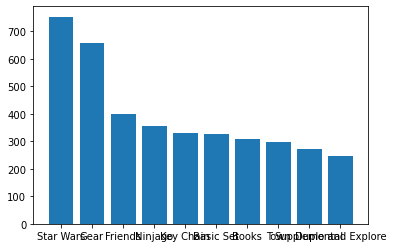

In [92]:
#Creating a Bar Chart:Using .bar() we can provide our theme names and the number of sets
plt.bar(merged_df.name[:10],merged_df.set_count[:10])

<BarContainer object of 10 artists>

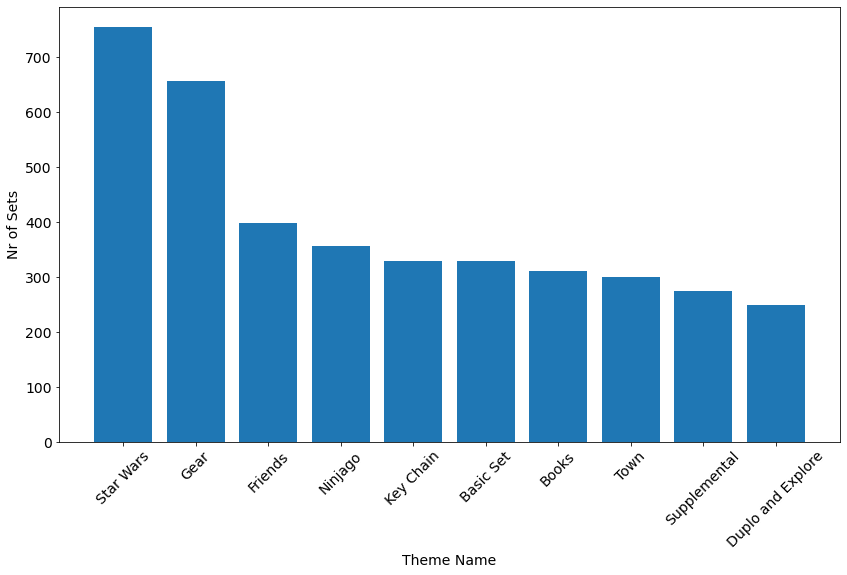

In [95]:
#Here's what we get when we increase the size of our figure, add some labels, and most importantly, rotate the category names on the x-axis so that they don't overlap.
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets',fontsize=14)
plt.xlabel('Theme Name',fontsize=14)

plt.bar(merged_df.name[:10],merged_df.set_count[:10])

In [ ]:
"""
Learning Points & Summary
In this lesson we looked at how to:

use HTML Markdown in Notebooks, such as section headings # and how to embed images with the <img> tag.

combine the groupby() and count() functions to aggregate data

use the .value_counts() function

slice DataFrames using the square bracket notation e.g., df[:-2] or df[:10]

use the .agg() function to run an operation on a particular column

rename() columns of DataFrames

create a line chart with two separate axes to visualise data that have different scales.

create a scatter plot in Matplotlib

work with tables in a relational database by using primary and foreign keys

.merge() DataFrames along a particular column

create a bar chart with Matplotlib

"""